# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [24]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [25]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()


Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因


In [26]:
#app_train[app_train['OWN_CAR_AGE'] <= 10]['AMT_INCOME_TOTAL'].mean()
#app_train[app_train['DAYS_BIRTH']/(-365) > 60][['OWN_CAR_AGE','AMT_INCOME_TOTAL','DAYS_BIRTH']].describe()
#app_train[app_train['OWN_CAR_AGE'] >= 50 ]['TARGET'].mean() * 100

#app_train['AMT_INCOME_TOTAL'].plot.hist()
#app_train['AMT_INCOME_TOTAL'].describe()

app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [30]:

dtype_select = [int,float]
numeric_columns = list(app_train.columns[ list(app_train.dtypes.isin(dtype_select))])
print(numeric_columns)
#app_train[n].columns[0]
l = list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))
l2 = list(app_train[numeric_columns].columns[l])
print(len(l2))
#numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
#print(numeric_columns)


['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',

In [31]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [int]
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
print(numeric_columns)
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    
    plt.hist(app_train[col])
    
    plt.show()

[]


TypeError: not all arguments converted during string formatting

Numbers of remain columns :  73


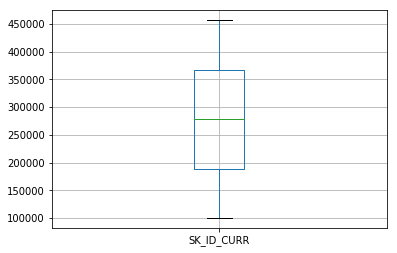

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


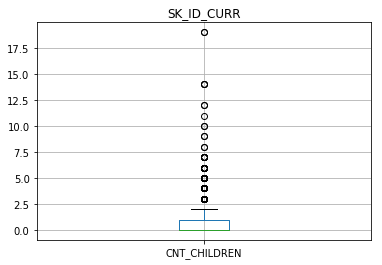

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


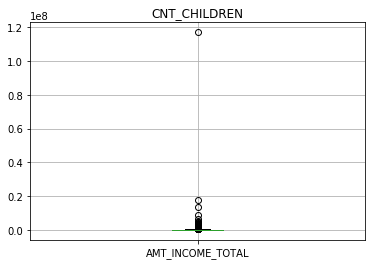

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


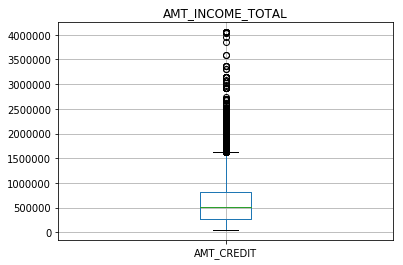

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


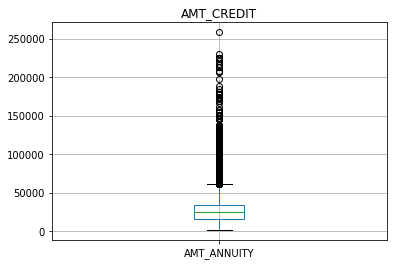

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


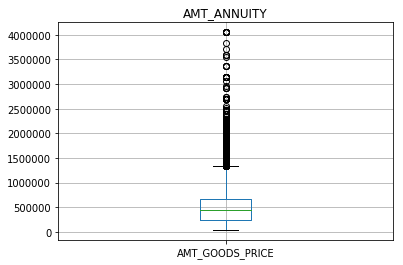

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


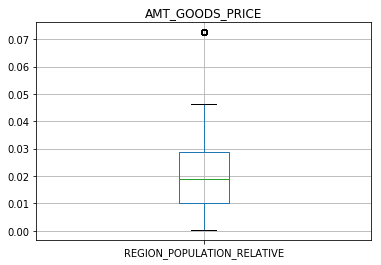

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


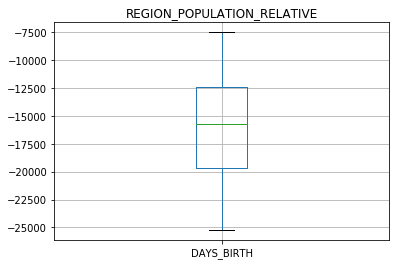

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


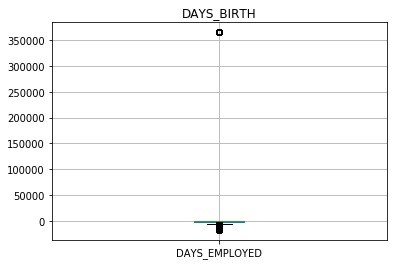

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


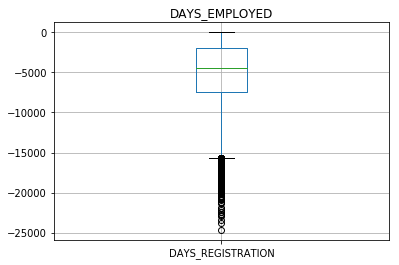

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


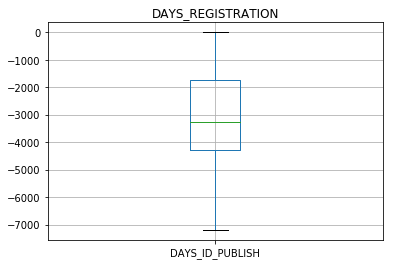

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


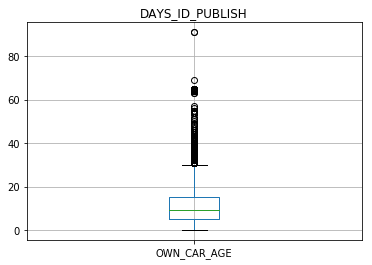

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


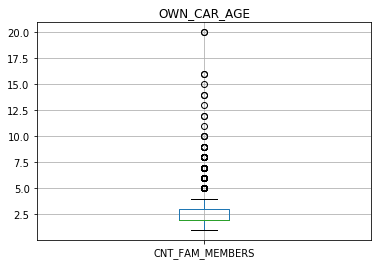

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


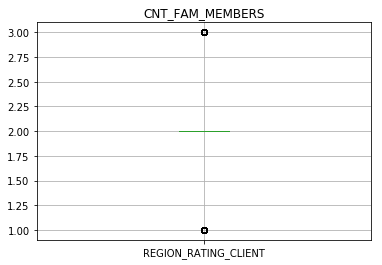

count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


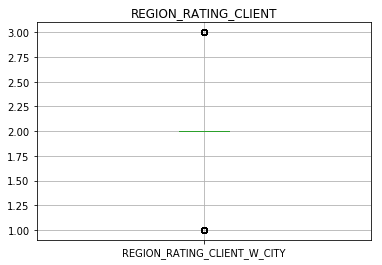

count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


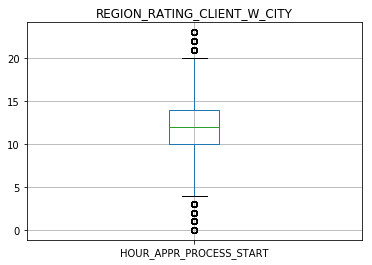

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


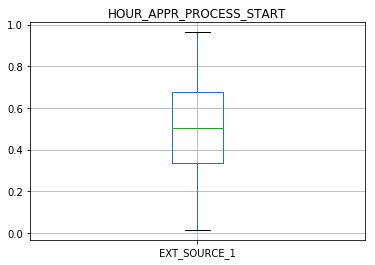

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64


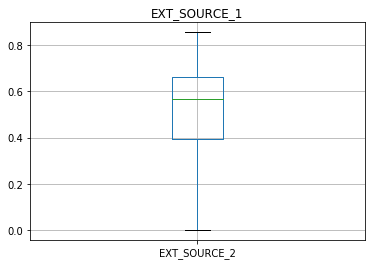

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


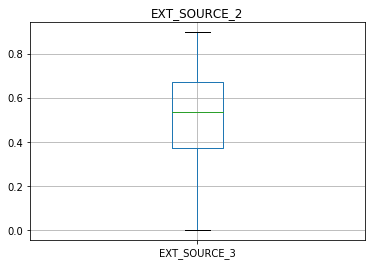

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


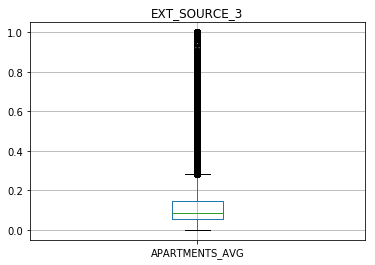

count    151450.00000
mean          0.11744
std           0.10824
min           0.00000
25%           0.05770
50%           0.08760
75%           0.14850
max           1.00000
Name: APARTMENTS_AVG, dtype: float64


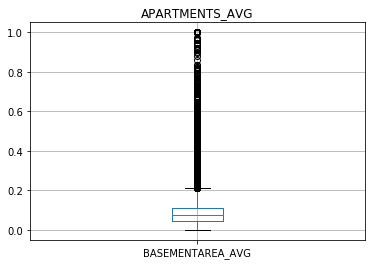

count    127568.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64


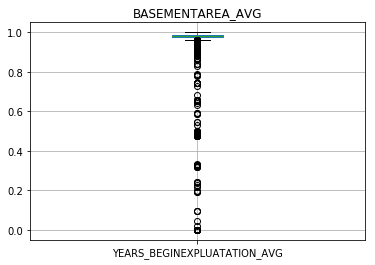

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


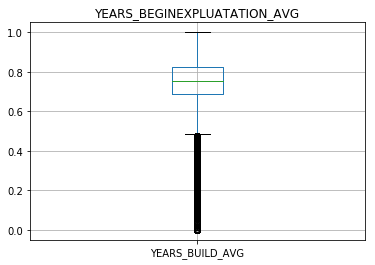

count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64


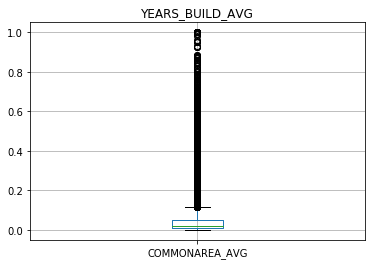

count    92646.000000
mean         0.044621
std          0.076036
min          0.000000
25%          0.007800
50%          0.021100
75%          0.051500
max          1.000000
Name: COMMONAREA_AVG, dtype: float64


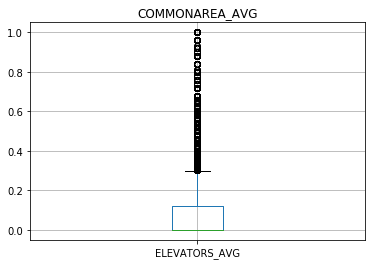

count    143620.000000
mean          0.078942
std           0.134576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64


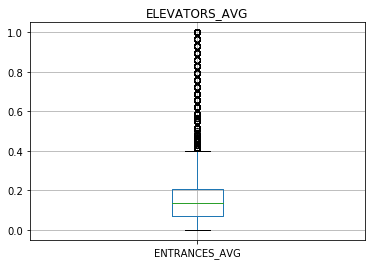

count    152683.000000
mean          0.149725
std           0.100049
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64


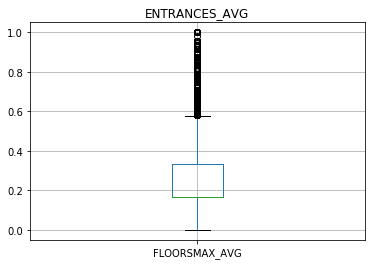

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64


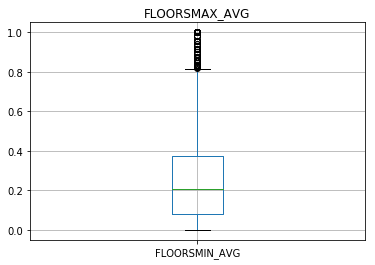

count    98869.000000
mean         0.231894
std          0.161380
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64


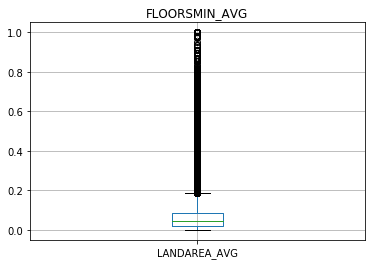

count    124921.000000
mean          0.066333
std           0.081184
min           0.000000
25%           0.018700
50%           0.048100
75%           0.085600
max           1.000000
Name: LANDAREA_AVG, dtype: float64


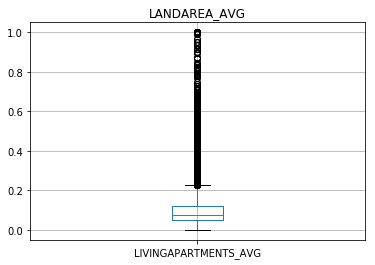

count    97312.000000
mean         0.100775
std          0.092576
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64


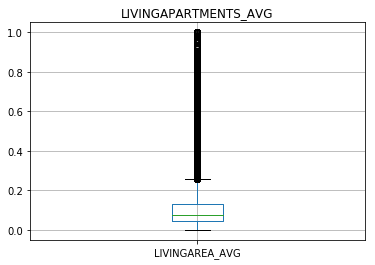

count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64


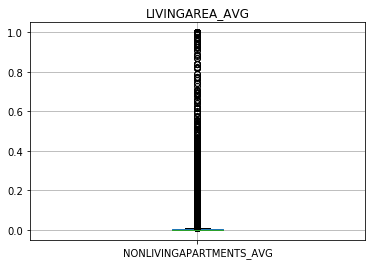

count    93997.000000
mean         0.008809
std          0.047732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


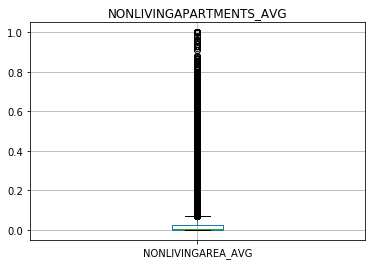

count    137829.000000
mean          0.028358
std           0.069523
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027700
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64


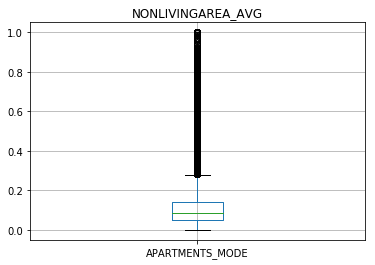

count    151450.000000
mean          0.114231
std           0.107936
min           0.000000
25%           0.052500
50%           0.084000
75%           0.143900
max           1.000000
Name: APARTMENTS_MODE, dtype: float64


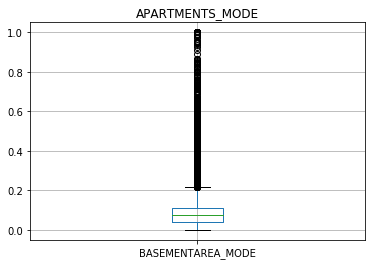

count    127568.000000
mean          0.087543
std           0.084307
min           0.000000
25%           0.040700
50%           0.074600
75%           0.112400
max           1.000000
Name: BASEMENTAREA_MODE, dtype: float64


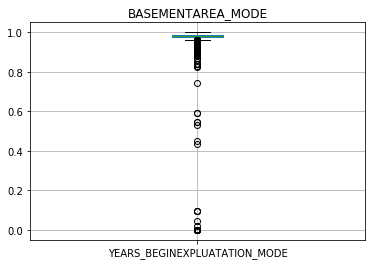

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64


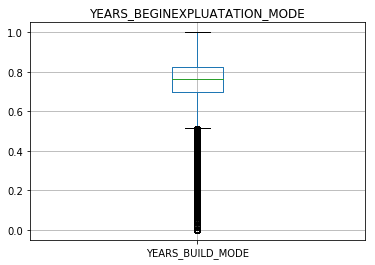

count    103023.000000
mean          0.759637
std           0.110111
min           0.000000
25%           0.699400
50%           0.764800
75%           0.823600
max           1.000000
Name: YEARS_BUILD_MODE, dtype: float64


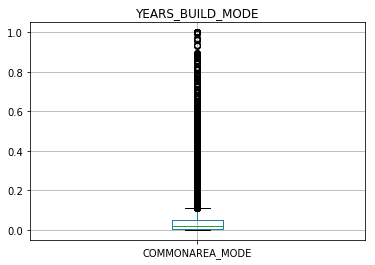

count    92646.000000
mean         0.042553
std          0.074445
min          0.000000
25%          0.007200
50%          0.019000
75%          0.049000
max          1.000000
Name: COMMONAREA_MODE, dtype: float64


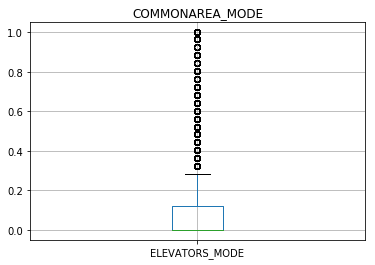

count    143620.000000
mean          0.074490
std           0.132256
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120800
max           1.000000
Name: ELEVATORS_MODE, dtype: float64


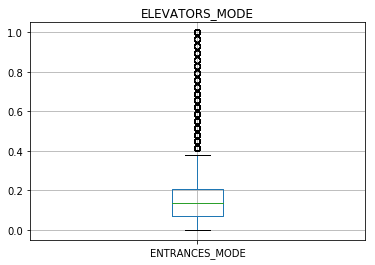

count    152683.000000
mean          0.145193
std           0.100977
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MODE, dtype: float64


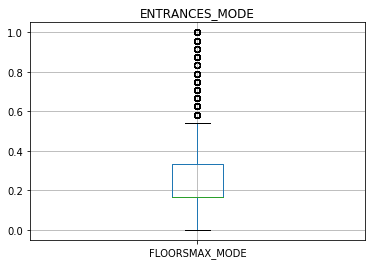

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64


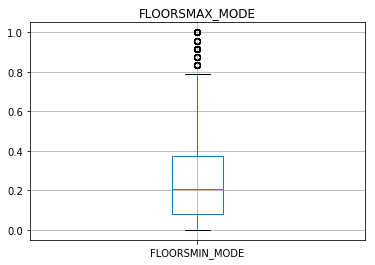

count    98869.000000
mean         0.228058
std          0.161160
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MODE, dtype: float64


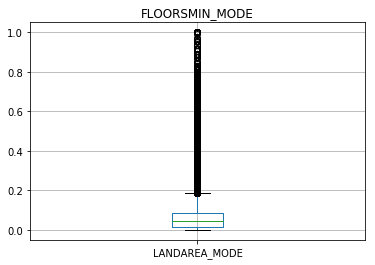

count    124921.000000
mean          0.064958
std           0.081750
min           0.000000
25%           0.016600
50%           0.045800
75%           0.084100
max           1.000000
Name: LANDAREA_MODE, dtype: float64


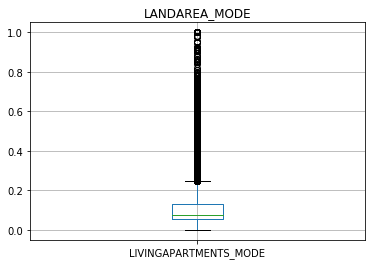

count    97312.000000
mean         0.105645
std          0.097880
min          0.000000
25%          0.054200
50%          0.077100
75%          0.131300
max          1.000000
Name: LIVINGAPARTMENTS_MODE, dtype: float64


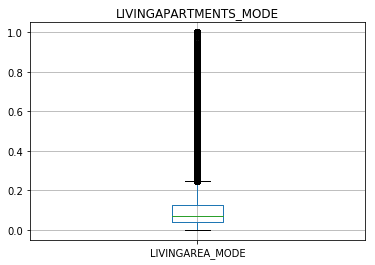

count    153161.000000
mean          0.105975
std           0.111845
min           0.000000
25%           0.042700
50%           0.073100
75%           0.125200
max           1.000000
Name: LIVINGAREA_MODE, dtype: float64


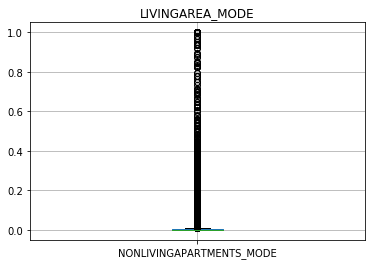

count    93997.000000
mean         0.008076
std          0.046276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64


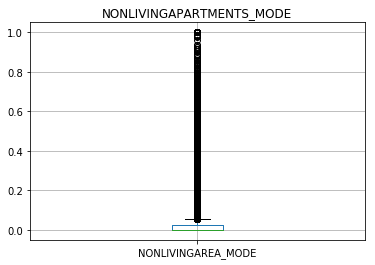

count    137829.000000
mean          0.027022
std           0.070254
min           0.000000
25%           0.000000
50%           0.001100
75%           0.023100
max           1.000000
Name: NONLIVINGAREA_MODE, dtype: float64


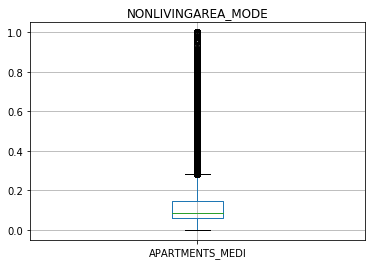

count    151450.000000
mean          0.117850
std           0.109076
min           0.000000
25%           0.058300
50%           0.086400
75%           0.148900
max           1.000000
Name: APARTMENTS_MEDI, dtype: float64


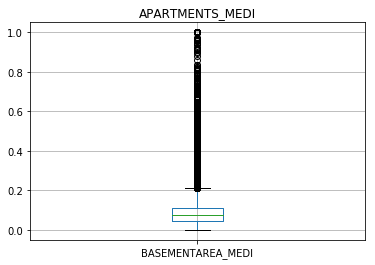

count    127568.000000
mean          0.087955
std           0.082179
min           0.000000
25%           0.043700
50%           0.075800
75%           0.111600
max           1.000000
Name: BASEMENTAREA_MEDI, dtype: float64


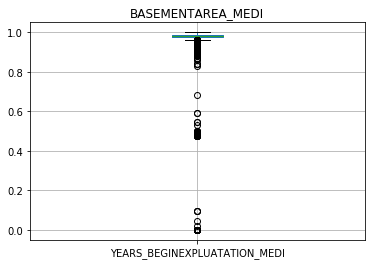

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64


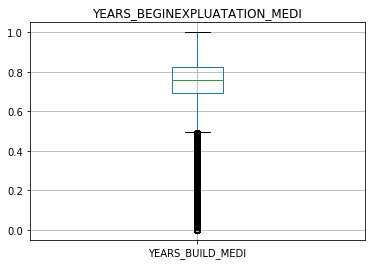

count    103023.000000
mean          0.755746
std           0.112066
min           0.000000
25%           0.691400
50%           0.758500
75%           0.825600
max           1.000000
Name: YEARS_BUILD_MEDI, dtype: float64


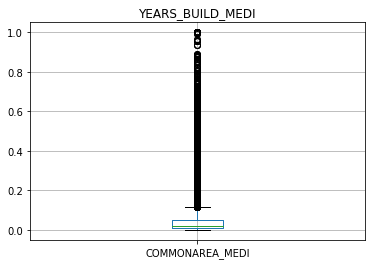

count    92646.000000
mean         0.044595
std          0.076144
min          0.000000
25%          0.007900
50%          0.020800
75%          0.051300
max          1.000000
Name: COMMONAREA_MEDI, dtype: float64


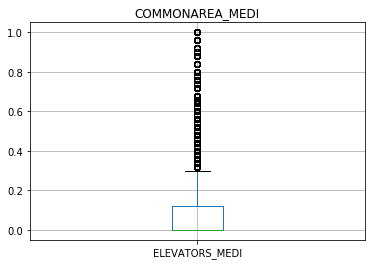

count    143620.000000
mean          0.078078
std           0.134467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_MEDI, dtype: float64


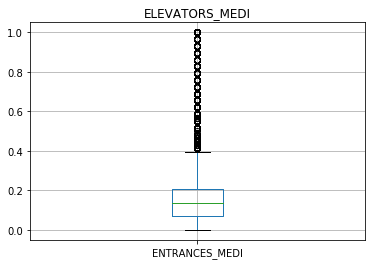

count    152683.000000
mean          0.149213
std           0.100368
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MEDI, dtype: float64


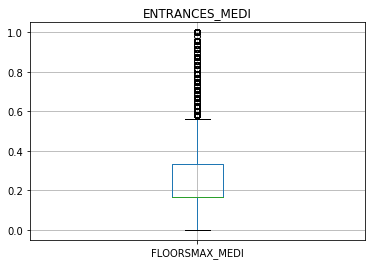

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64


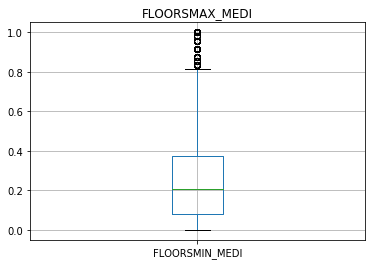

count    98869.000000
mean         0.231625
std          0.161934
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MEDI, dtype: float64


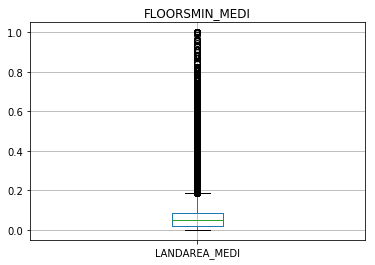

count    124921.000000
mean          0.067169
std           0.082167
min           0.000000
25%           0.018700
50%           0.048700
75%           0.086800
max           1.000000
Name: LANDAREA_MEDI, dtype: float64


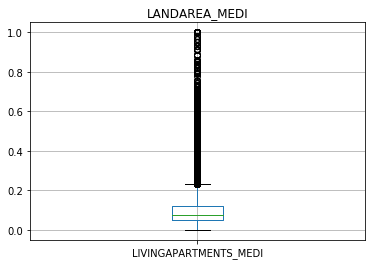

count    97312.000000
mean         0.101954
std          0.093642
min          0.000000
25%          0.051300
50%          0.076100
75%          0.123100
max          1.000000
Name: LIVINGAPARTMENTS_MEDI, dtype: float64


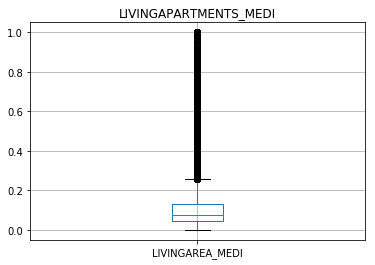

count    153161.000000
mean          0.108607
std           0.112260
min           0.000000
25%           0.045700
50%           0.074900
75%           0.130300
max           1.000000
Name: LIVINGAREA_MEDI, dtype: float64


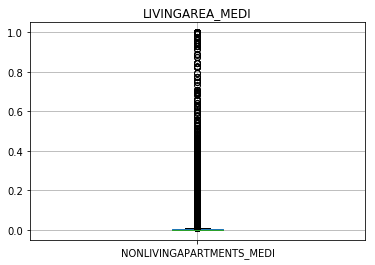

count    93997.000000
mean         0.008651
std          0.047415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64


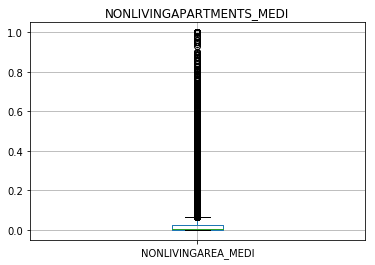

count    137829.000000
mean          0.028236
std           0.070166
min           0.000000
25%           0.000000
50%           0.003100
75%           0.026600
max           1.000000
Name: NONLIVINGAREA_MEDI, dtype: float64


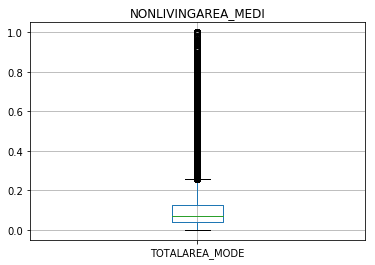

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64


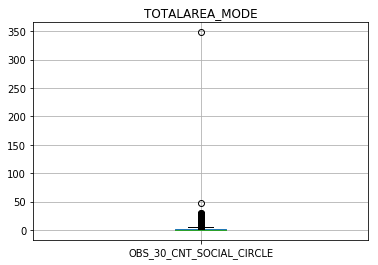

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


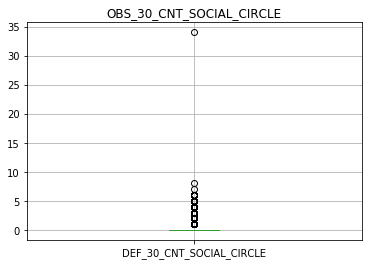

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


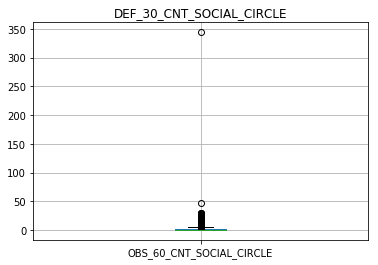

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


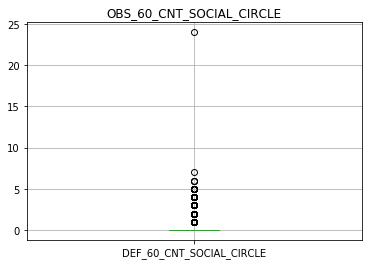

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


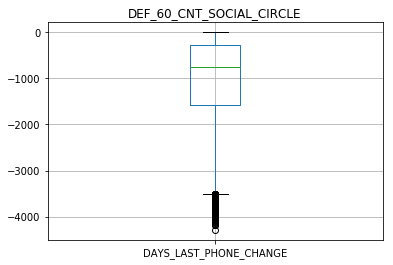

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


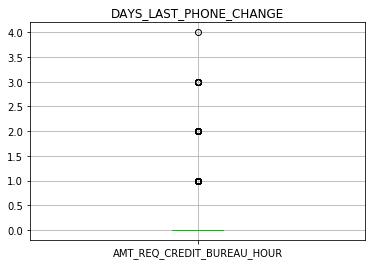

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


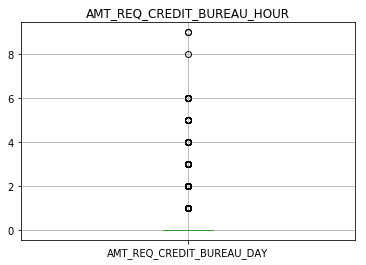

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


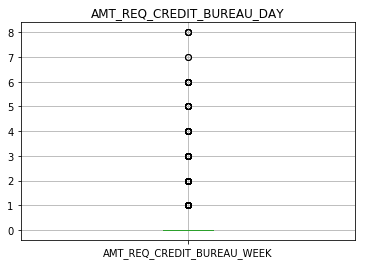

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


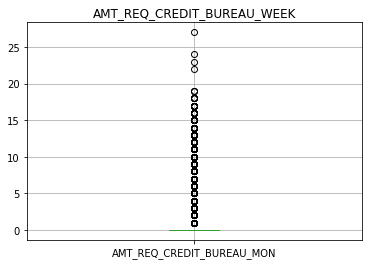

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


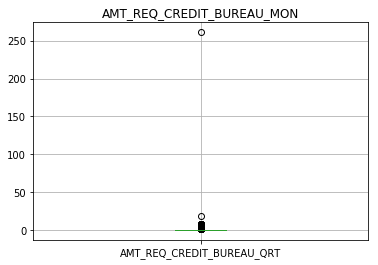

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


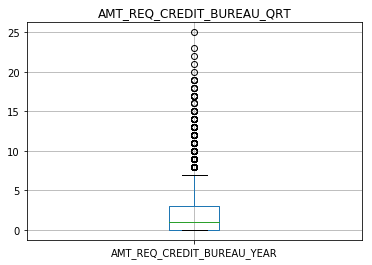

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


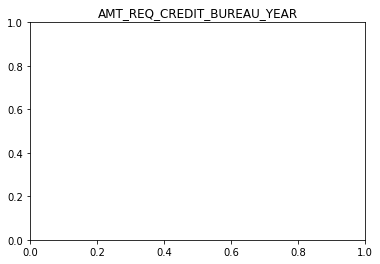

In [274]:
dtype_select = [int,str,float]
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
#print(numeric_columns)
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns : ", len(numeric_columns))


for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    #ax1 = plt.hist(app_train[col])
    
    app_train.boxplot(col)
    plt.show()
    print(app_train[col].describe())
    plt.title(col)

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


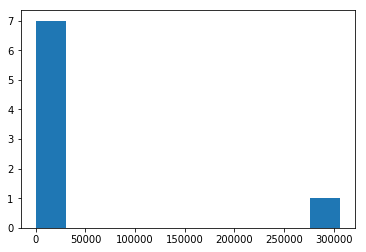

In [32]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# REGION_POPULATION_RALATIVE
# DAYS_EMPLOYED
# OWN_CAR_AGE
# REGION_RATING_CLIENT
# REGION_RATING_CLIENT_W_CITY
# YEARS_BEGINEXPLUATATION_AVG
# YEARS_BEGINEXPLUATATION_MODE
# COMMONAREA_AVG


# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

plt.hist(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())
?plt.subplot

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

0.0022540218268310044


4.941509e-07      0.000785
5.028203e-07      0.001962
5.097557e-07      0.002355
5.114896e-07      0.003140
5.201589e-07      0.029042
5.314290e-07      0.029435
5.374975e-07      0.032182
5.387979e-07      0.032575
5.425257e-07      0.032967
5.461668e-07      0.037284
5.472071e-07      0.037677
5.505015e-07      0.038854
5.508483e-07      0.039246
5.533624e-07      0.039639
5.548361e-07      0.040816
5.612514e-07      0.041209
5.635055e-07      0.053768
5.699207e-07      0.054160
5.721748e-07      0.055338
5.808441e-07      0.058085
5.895134e-07      0.060440
5.955819e-07      0.060832
5.981827e-07      0.061224
6.068520e-07      0.133438
6.074589e-07      0.133830
6.129206e-07      0.134223
6.137875e-07      0.134615
6.155213e-07      0.136185
6.163016e-07      0.136578
6.172552e-07      0.136970
                   ...    
2.617266e-05    120.652669
2.661480e-05    120.653061
2.730834e-05    120.653454
2.774181e-05    120.654239
2.947567e-05    120.654631
3.034260e-05    120.661695
3

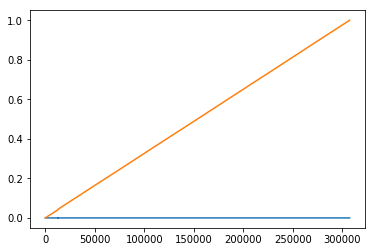

In [45]:
# 最大值離平均與中位數很遠


#h = app_train['AMT_INCOME_TOTAL'].head()
#h = app_train['AMT_INCOME_TOTAL'].head()
h = app_train['AMT_INCOME_TOTAL']
pdf = h / sum(h)
cdf = pdf.cumsum()

plt.plot(pdf)
plt.plot(cdf)
print(pdf.max())

sq=pdf.value_counts()
sq.sort_index().cumsum()*1./len(sq)


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


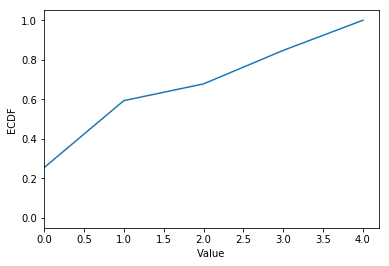

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


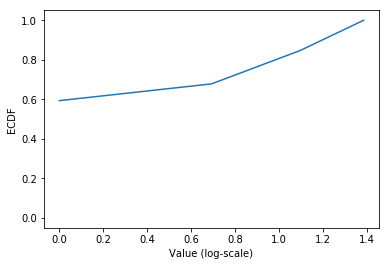

In [40]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
t = app_train['AMT_INCOME_TOTAL'];
pdf = h / sum(h)
cdf = pdf.cumsum()

#for data in app_train['AMT_INCOME_TOTAL']:


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


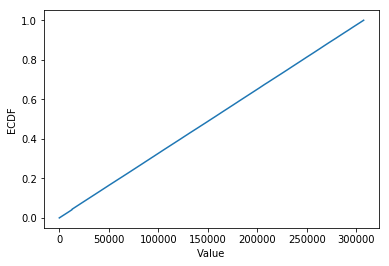

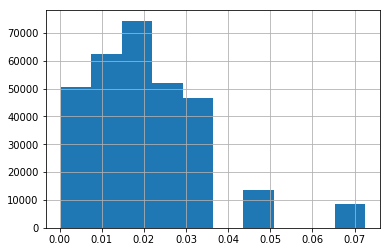

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [47]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
t = app_train['REGION_POPULATION_RELATIVE'];
pdf = h / sum(h)
cdf = pdf.cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


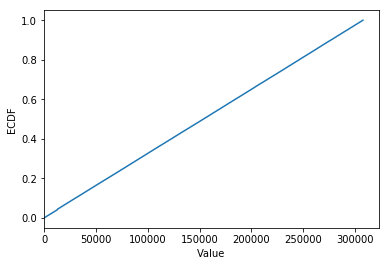

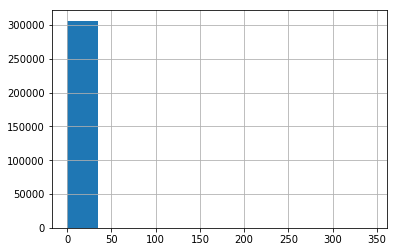

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [49]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""

t = app_train['REGION_POPULATION_RELATIVE'];
pdf = h / sum(h)
cdf = pdf.cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

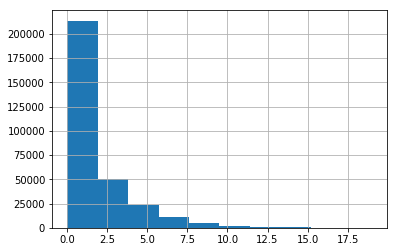

In [61]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train[app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20].index
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

#print(loc_a)
#print(loc_b)
app_train.loc[loc_a, loc_b].hist()
#plt.show()